In [2]:
import pickle
from hyperopt import space_eval
from hyperopt import hp
import matplotlib.pyplot as plt

In [2]:
space: dict = {
            'loss': hp.choice('loss', [('dice_loss', 0), ('BinaryCrossentropy', 0), ('tversky_loss', 0.15), ('tversky_loss', 0.35), ('tversky_loss', 0.65), ('tversky_loss', 0.85)]),
            'base_filter_count': hp.randint('base_filter_count.default', 2, 64),
            'block_count': hp.choice('block_count', [3, 5, 7, 9, 11]),
            'kernel_size': {'default': hp.randint('kernel_size.default', 2, 8)},
            'dropout': {'default': hp.uniform('dropout.default', 0.0, 1.0)},
        }

In [3]:
with open (r'C:\Users\ricof\Documents\AI-Cup 2022\src\trials.pkl', 'rb') as f:
    trials = pickle.load(f)

In [4]:
val_accuracies = []
for t in trials._dynamic_trials:
    val_accuracies.append(((t['result'])['metrics'])['val_accuracy'])

In [8]:
space_eval(trials._dynamic_trials[10], space)

{'book_time': datetime.datetime(2022, 4, 15, 17, 32, 8, 534000),
 'exp_key': None,
 'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'idxs': {'base_filter_count.default': (10,),
   'block_count': (10,),
   'dropout.default': (10,),
   'kernel_size.default': (10,),
   'loss': (10,)},
  'tid': 10,
  'vals': {'base_filter_count.default': (24,),
   'block_count': (0,),
   'dropout.default': (0.26995171693159836,),
   'kernel_size.default': (4,),
   'loss': (0,)},
  'workdir': None},
 'owner': None,
 'refresh_time': datetime.datetime(2022, 4, 15, 17, 40, 50, 388000),
 'result': {'loss': -0.9344228108723959,
  'metrics': {'accuracy': 0.9319254557291666,
   'auc': 0.9295401771863302,
   'binary_crossentropy': 0.6290760040283203,
   'dice_loss': 0.32353028655052185,
   'loss': 0.3403850495815277,
   'mean_absolute_error': 0.0654476856191953,
   'precision': 0.9222801725069681,
   'precision_at_recall': 0.9360438585281372,
   'recall': 0.965487539768219,
   'val_accuracy': 0.93442281

In [34]:
for t in trials.trials:
    print(t['misc']['vals'])
    break

{'base_filter_count.default': [45], 'block_count': [1], 'dropout.default': [0.25408126586843105], 'kernel_size.default': [7], 'loss': [4]}


In [10]:
base_filter_count = []
block_count = []
dropout = []
kernel_size = []
loss_type = []
loss_beta = []
loss = []

for _, trial in enumerate(trials.trials):
    
    translated_eval = space_eval(space, {k: v[0] for k, v in trial['misc']['vals'].items()})
    base_filter_count.append(translated_eval['base_filter_count'])
    dropout.append(translated_eval['dropout']['default'])
    kernel_size.append(translated_eval['kernel_size']['default'])
    lt, lp = translated_eval['loss']
    loss_type.append(lt)
    loss_beta.append(lp)
    base_filter_count.append(translated_eval['base_filter_count'])
    loss.append(translated_eval['loss'])
    

In [12]:
translated_eval

{'base_filter_count': 10,
 'block_count': 5,
 'dropout': {'default': 0.2750209115617893},
 'kernel_size': {'default': 4},
 'loss': ('tversky_loss', 0.85)}

In [47]:
color_dict = {
    'tversky_loss' : 0,
    'dice_loss' : 1, 
    'BinaryCrossentropy' : 2
}

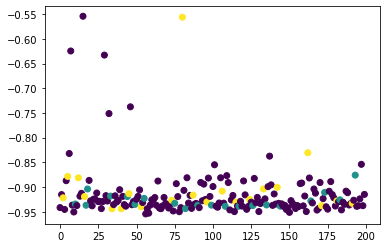

In [48]:
plt.scatter(x=[i for i in range(len(trials.losses()))], y=trials.losses(), c=[color_dict[lt] for lt in loss_type])